In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [22]:
df1 = pd.read_csv('./Training_Data/Linear_X_Train.csv')
df2 = pd.read_csv('./Training_Data/Linear_Y_Train.csv')

In [23]:
x = df1.values
y = df2.values
plt.style.use('seaborn')

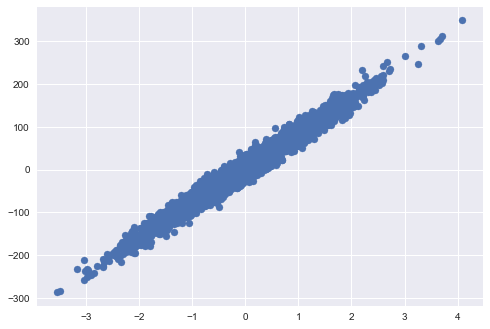

In [24]:
plt.scatter(x,y)

In [25]:
X2 = (x-x.mean())/x.std()
Y = y
ones = np.ones((X2.shape[0],1))
X = np.hstack((ones,X2))
print(X)

[[ 1.         -0.25352061]
 [ 1.         -0.55541377]
 [ 1.          1.07380656]
 ...
 [ 1.         -0.26950343]
 [ 1.          1.72730762]
 [ 1.         -0.4575866 ]]


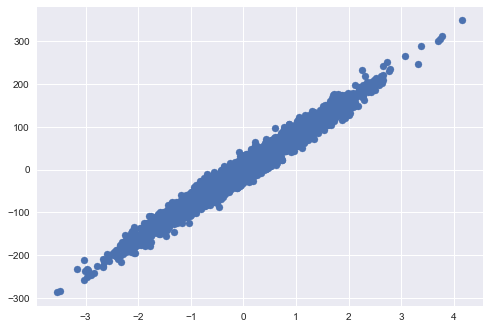

In [26]:
plt.scatter(X[:,-1],Y)

In [27]:
def hypothesis(theta, x):
    return np.dot(x, theta)


def error(X, Y, theta):
    error = 0
    m = X.shape[0]
    y_ = hypothesis(theta, X)
    error = np.sum(np.square(Y - y_))
    return error/m


def gradient(X, Y, theta):
    grad = np.dot(X.T, (Y-hypothesis(theta, X)))
    m = X.shape[0]
    return grad/m


def gradient_decent(X, Y, lr=0.01, max_itr=1000):
    n = X.shape[1]
    theta = np.zeros((n,1))
    err = []
    itr = 0
    while(itr < max_itr):
        err.append(error(X, Y, theta))
        grad = gradient(X, Y, theta)
        theta = theta + lr*grad
        itr += 1
    return theta, err

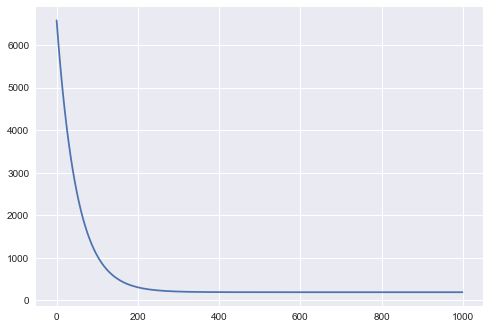

[[ 0.68383944]
 [79.90228731]]


In [28]:
final_t,e = gradient_decent(X,Y)
plt.plot(e)
plt.show()
print(final_t)

In [29]:
lr = LinearRegression()
lr.fit(X,Y)
lr.score(X,Y)

0.9709612233822353

In [30]:
df3 = pd.read_csv('./Test_Data/Linear_X_Test.csv')

In [31]:
X_test2 = df3.values

In [32]:
ones = np.ones((X_test2.shape[0],1))
X_test = np.hstack((ones,X_test2))
X_test

array([[ 1.        , -1.87794441],
       [ 1.        , -0.86903192],
       [ 1.        , -2.53018242],
       ...,
       [ 1.        ,  0.12800782],
       [ 1.        , -0.27803759],
       [ 1.        , -0.68042543]])

In [33]:
Y_test = hypothesis(final_t,X_test)
print(Y_test.shape,X_test.shape)

(1250, 1) (1250, 2)


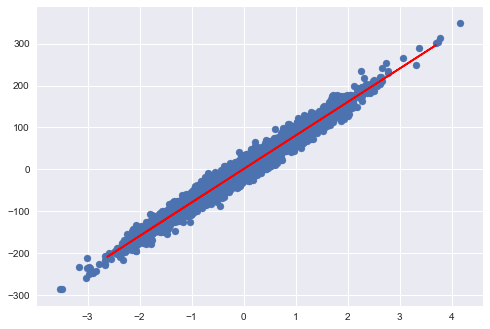

0.9709612233822353

In [34]:
plt.plot(X_test2,Y_test,color='red')
plt.scatter(X2,Y)
plt.show()
lr.score(X,Y)

In [35]:
Y_test

array([[-149.36821468],
       [ -68.75379838],
       [-201.4835236 ],
       ...,
       [  10.91195715],
       [ -21.53199993],
       [ -53.68370864]])

In [36]:
df4 = pd.DataFrame(Y_test)

In [37]:
df4

,0
0,-149.368215
1,-68.753798
2,-201.483524
3,221.230568
4,47.906102
...,...
1245,-12.744418
1246,75.170554
1247,10.911957
1248,-21.532000


In [38]:
df2

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187
...,...
3745,-13.530595
3746,114.741657
3747,-34.983275
3748,145.206092


In [39]:
df4.to_csv('answer.csv')

In [40]:
Ys = hypothesis(final_t,X)

In [41]:
dfk = pd.DataFrame(Ys)

In [42]:
dfk

,0
0,-19.573037
1,-43.694991
2,86.483440
3,-17.133122
4,66.713706
...,...
3745,-4.406089
3746,112.392376
3747,-20.850101
3748,138.699669


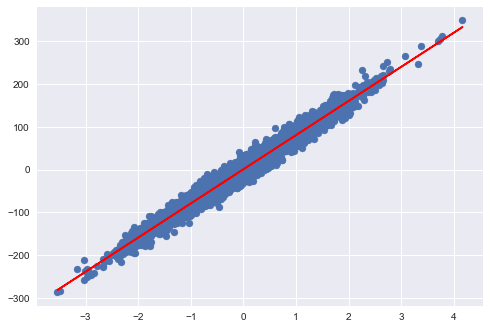

In [43]:
plt.scatter(X2,Y)
plt.plot(X2,Ys,color='red')

In [17]:
from sklearn.externals import joblib

In [44]:
m = joblib.dump(lr,'./model.pkl')